In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
sample = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
item_cat = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
sales = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

**Functions**

In [3]:
def EDA(data):
    print("-----------Top-5-Record---------")
    print(data.head(5))
    print("-----------Information---------")
    print(data.info())
    print("-----------Data types---------")
    print(data.dtypes)
    print("-----------Missingvalue---------")
    print(data.isnull().sum())
    print("-----------Null value---------")
    print(data.isna().sum())
    print("-----------shape of data---------")
    print(data.shape)
          
def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize = (16,16), bins=50, xlabelsize = 8, ylabelsize = 8)

def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset, keep ='first', inplace = True)
    # subset is list of columns for duplicate check
    data.reset_index(drop = True, inplace = True)
    print('After drop shape:', data.shape)
    after= data.shape[0]
    print('Total Duplicate:', before-after)

# ****EDA****

In [4]:
EDA(sales)

-----------Top-5-Record---------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
-----------Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----------Data types---------
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64


In [5]:
sales.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

{dtype('O'), dtype('int64'), dtype('float64')}


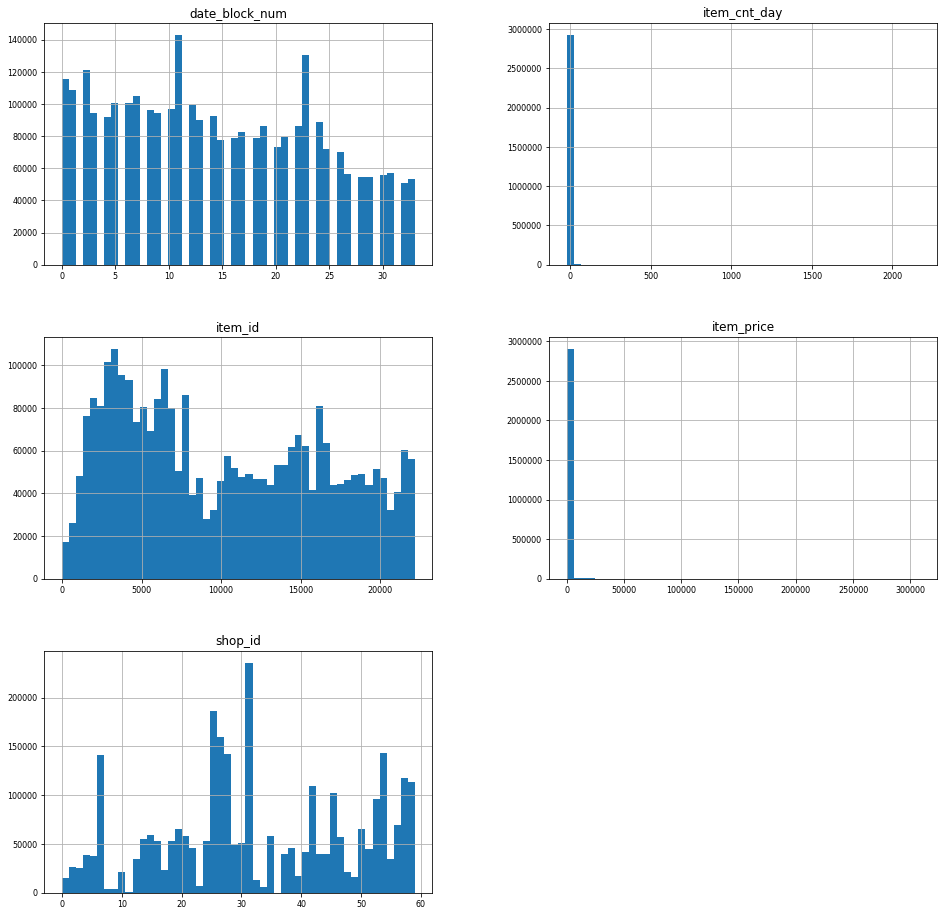

In [6]:
graph_insight(sales)

In [7]:
# Drop duplicate data
subset = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day']
drop_duplicate(sales, subset =subset)

Before drop shape: (2935849, 6)
After drop shape: (2935825, 6)
Total Duplicate: 24


****2. Test Data****

-----------Top-5-Record---------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
-----------Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
-----------Data types---------
ID         int64
shop_id    int64
item_id    int64
dtype: object
-----------Missingvalue---------
ID         0
shop_id    0
item_id    0
dtype: int64
-----------Null value---------
ID         0
shop_id    0
item_id    0
dtype: int64
-----------shape of data---------
(214200, 3)
{dtype('int64')}


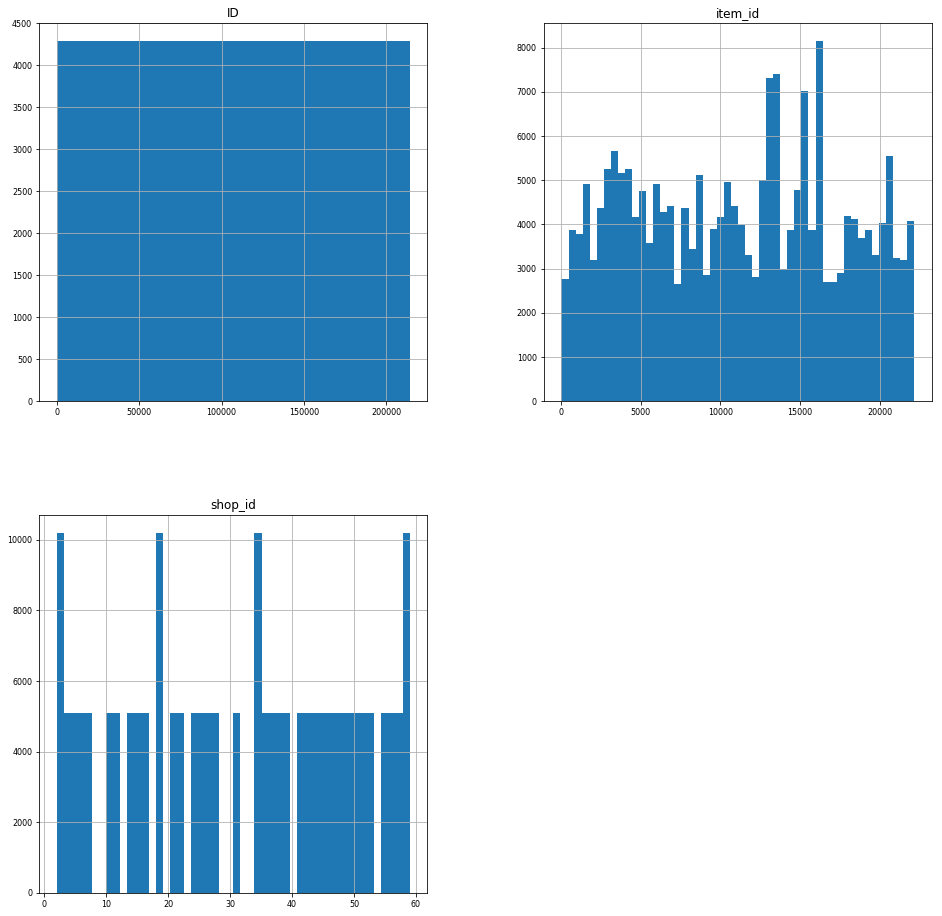

In [8]:
EDA(test)
graph_insight(test)

item

-----------Top-5-Record---------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
-----------Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
-----------Data types---------
item_name           object
item_id              int64
item_category_id     int64
dtype: obje

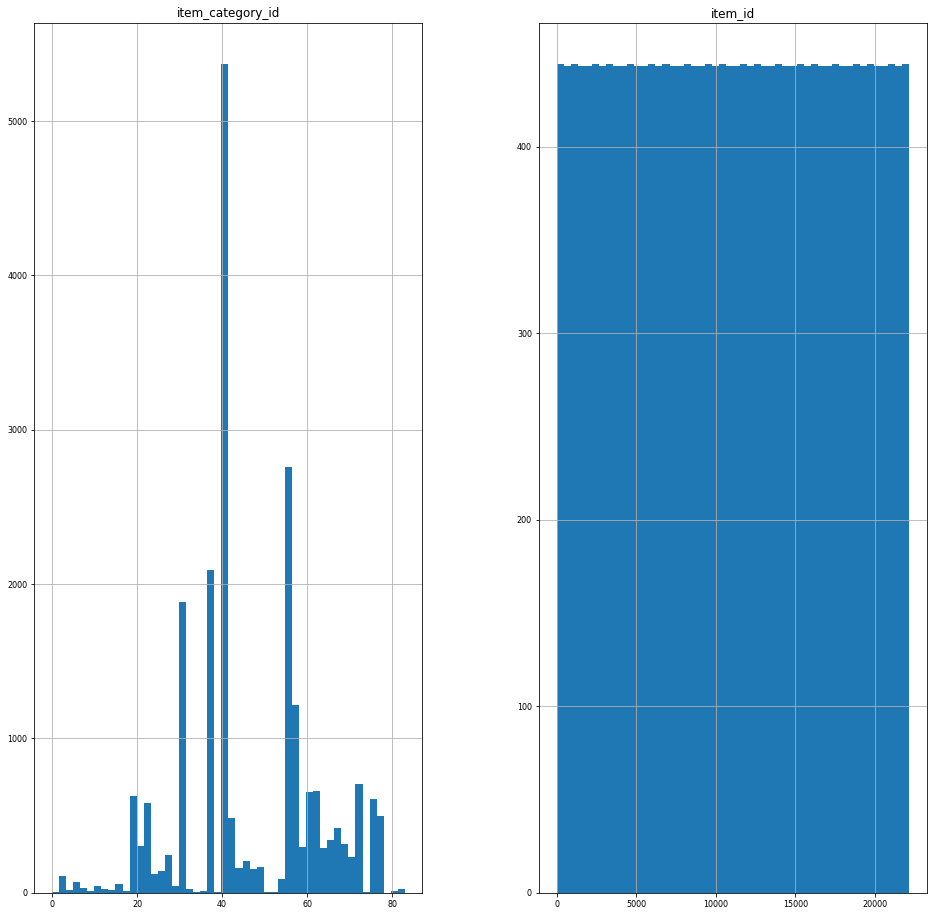

In [9]:
EDA(items)
graph_insight(items)

item category

-----------Top-5-Record---------
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
-----------Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
-----------Data types---------
item_category_name    object
item_category_id       int64
dtype: object
-----------Missingvalue---------
item_category_name    0
item_category_id      0
dtype: int64
-----------Null value---------
item_category_name    0
item_category_id      0
dtype: int64
-----------shape of data---------
(84, 2)
{dtype('O'), dtype('int64')}


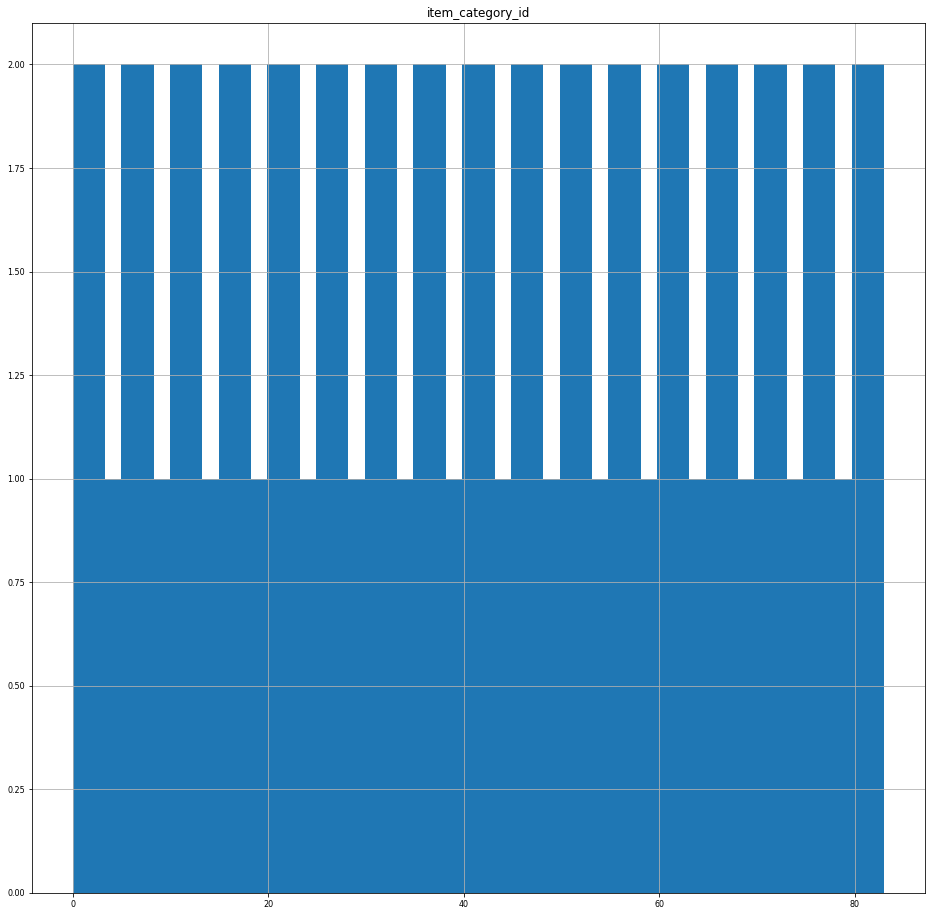

In [10]:
EDA(item_cat)
graph_insight(item_cat)

In [11]:
def unreasonable_data(data):
    print("min value:", data.min())
    print('max value:', data.max())
    print('average value: ', data.mean())
    print('center point of data:', data.median())

In [12]:
unreasonable_data(sales)

min value: date              01.01.2013
date_block_num             0
shop_id                    0
item_id                    0
item_price                -1
item_cnt_day             -22
dtype: object
max value: date              31.12.2014
date_block_num            33
shop_id                   59
item_id                22169
item_price            307980
item_cnt_day            2169
dtype: object
average value:  date_block_num       14.569921
shop_id              33.001705
item_id           10197.205428
item_price          890.855786
item_cnt_day          1.242643
dtype: float64
center point of data: date_block_num      14.0
shop_id             31.0
item_id           9343.0
item_price         399.0
item_cnt_day         1.0
dtype: float64


In [13]:
print(sales['item_price'].mean())
print(sales['item_price'].std())

890.8557861463664
1729.806062448987


In [14]:
# -1 and 307980 looks like outliers, let's delete them
print('before sales shape:', sales.shape)
sales = sales[(sales.item_price > 0) & (sales.item_price < 300000)]
print('after sales shape:', sales.shape )

before sales shape: (2935825, 6)
after sales shape: (2935823, 6)


# Sales per month count

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935823 entries, 0 to 2935824
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.8+ MB


In [16]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


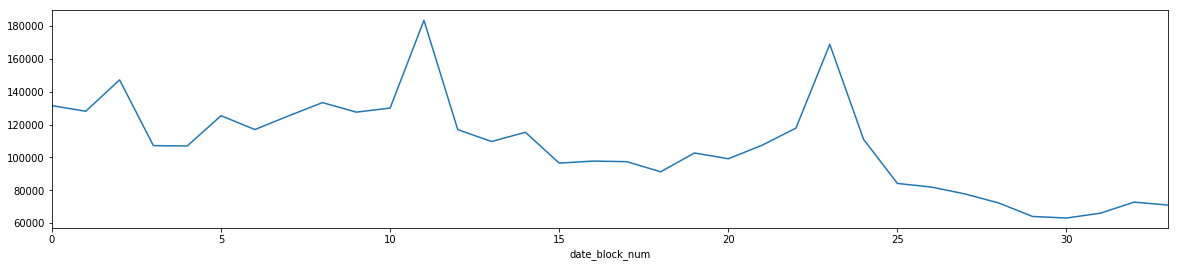

In [17]:
plt.figure(figsize=(20,4))
sales.groupby('date_block_num').sum()['item_cnt_day'].plot()

Text(0.5, 0, 'Price')

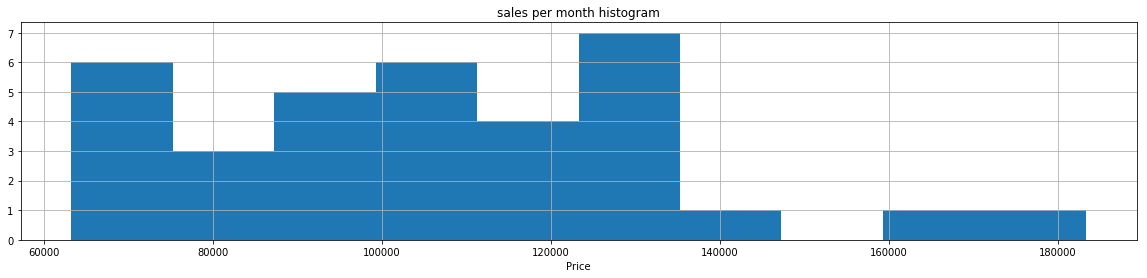

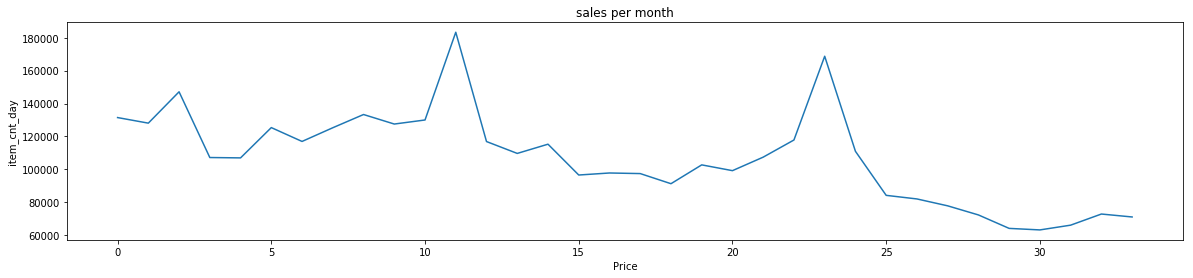

In [18]:
sales.groupby('date_block_num').sum()['item_cnt_day'].hist(figsize = (20, 4))
plt.title('sales per month histogram')
plt.xlabel('Price')
plt.figure(figsize = (20,4))
sns.lineplot(x =sales.date_block_num.unique() , y = sales.groupby('date_block_num').sum()['item_cnt_day'])
plt.title('sales per month')
plt.xlabel('Price')

# Distribution checking

In [19]:
unreasonable_data(sales['item_price'])

min value: 0.07
max value: 59200.0
average value:  890.7514892291379
center point of data: 399.0


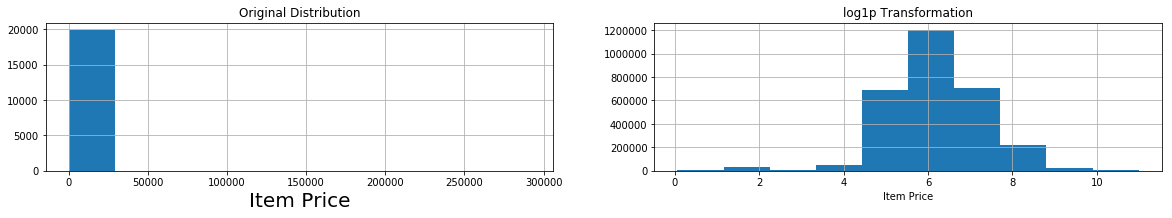

In [20]:
count_price = sales.item_price.value_counts().sort_index(ascending = False)
plt.subplot(221)
count_price.hist(figsize = (20,6))
plt.xlabel('Item Price', fontsize =20)
plt.title('Original Distribution')

plt.subplot(222)
sales.item_price.map(np.log1p).hist(figsize = (20,6))
plt.xlabel('Item Price')
plt.title('log1p Transformation')
sales.loc[:, 'item_price'] = sales.item_price.map(np.log1p)

In [21]:
unreasonable_data(sales.date_block_num)

min value: 0
max value: 33
average value:  14.569926047994038
center point of data: 14.0


Text(0.5, 1.0, 'original distribution')

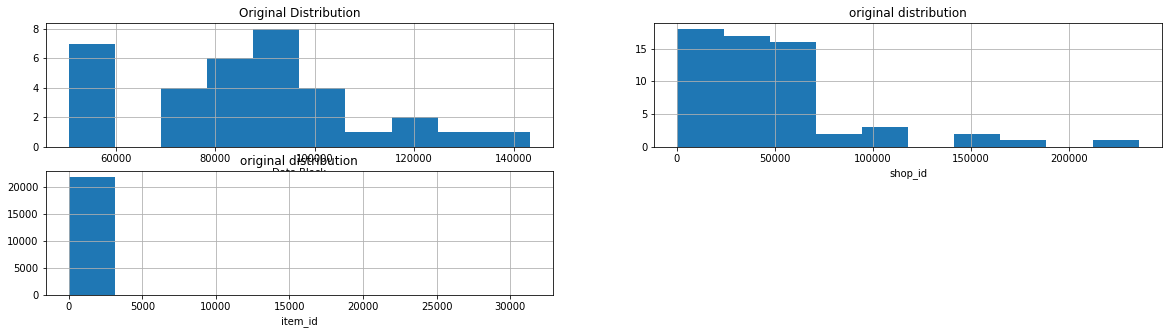

In [22]:
count_price = sales.date_block_num.value_counts().sort_index(ascending = False)
plt.subplot(221)
count_price.hist(figsize = (20,5))
plt.xlabel('Date Block')
plt.title('Original Distribution')

count_price = sales.shop_id.value_counts().sort_index(ascending = False)
plt.subplot(222)
count_price.hist(figsize = (20,5))
plt.xlabel('shop_id')
plt.title('original distribution')

count_price = sales.item_id.value_counts().sort_index(ascending = False)
plt.subplot(223)
count_price.hist(figsize=(20,5))
plt.xlabel('item_id')
plt.title('original distribution')

# Map the Items

In [23]:
l = list(item_cat.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'
    
for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


item_cat['cats'] = l_cat
item_cat.head()


,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


Convert Date Column data type from object to date

In [24]:
sales['date'] = pd.to_datetime(sales.date, format = '%d.%m.%Y')
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,6.907755,1.0
1,2013-01-03,0,25,2552,6.802395,1.0
2,2013-01-05,0,25,2552,6.802395,-1.0
3,2013-01-06,0,25,2554,7.444278,1.0
4,2013-01-15,0,25,2555,7.003065,1.0


In [25]:
p_df = sales.pivot_table(index = ['shop_id', 'item_id'], columns ='date_block_num', values ='item_cnt_day', aggfunc = 'sum').fillna(0.0)
p_df

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...              ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59      22154    1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22155    0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
        22162    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22164    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22167    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  
59      22154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[424123 rows x 34 columns]

In [26]:
# join with categories
sales_cleaned_df = p_df.reset_index()
sales_cleaned_df['shop_id'] = sales_cleaned_df.shop_id.astype('str')
item_to_cat_df = items.merge(item_cat[['item_category_id', 'cats']], how = 'inner', on = 'item_category_id')[['item_id', 'cats']]
#item_to_cat_df[['item_id']] = item_to_cat_df.item_id.astype('str')
sales_cleaned_df = sales_cleaned_df.merge(item_to_cat_df, how = 'inner', on = 'item_id')

# Encode Categories
from sklearn import preprocessing

number = preprocessing.LabelEncoder()
sales_cleaned_df[['cats']] = number.fit_transform(sales_cleaned_df.cats)
sales_cleaned_df = sales_cleaned_df[['shop_id', 'item_id', 'cats'] + list(range(34))]
sales_cleaned_df.head()

,shop_id,item_id,cats,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,7,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,7,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,7,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,7,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [27]:
import xgboost as xgb
param = {'max_depth':10,
        'subsample': 1,
        'min_child_weight': 0.5,
        'eta': 0.3,
        'num_round': 1000,
        'seed': 1, 
        'silend': 0,
        'eval_metric': 'rmse'}
progress = dict()
xgbtrain = xgb.DMatrix(sales_cleaned_df.iloc[:, (sales_cleaned_df.columns != 33)].values, sales_cleaned_df.iloc[:, sales_cleaned_df.columns == 33].values)
watchlist = [(xgbtrain, 'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(sales_cleaned_df.iloc[:,(sales_cleaned_df.columns != 33)].values))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(preds, sales_cleaned_df.iloc[:, sales_cleaned_df.columns == 33].values))
print(rmse)

[08:37:47] WARNING: /workspace/src/learner.cc:328: 
Parameters: { num_round, silend } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1.2689500930744357


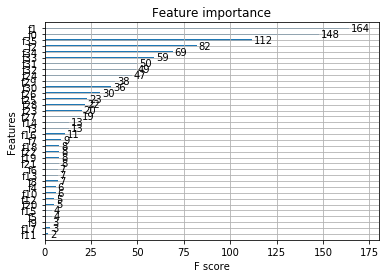

In [28]:
xgb.plot_importance(bst)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [30]:
sales_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424123 entries, 0 to 424122
Data columns (total 37 columns):
shop_id    424123 non-null object
item_id    424123 non-null int64
cats       424123 non-null int64
0          424123 non-null float64
1          424123 non-null float64
2          424123 non-null float64
3          424123 non-null float64
4          424123 non-null float64
5          424123 non-null float64
6          424123 non-null float64
7          424123 non-null float64
8          424123 non-null float64
9          424123 non-null float64
10         424123 non-null float64
11         424123 non-null float64
12         424123 non-null float64
13         424123 non-null float64
14         424123 non-null float64
15         424123 non-null float64
16         424123 non-null float64
17         424123 non-null float64
18         424123 non-null float64
19         424123 non-null float64
20         424123 non-null float64
21         424123 non-null float64
22         424123 n

In [31]:
apply_df = test
apply_df['shop_id'] = apply_df.shop_id.astype('str')
apply_df['item_id'] = apply_df.item_id.astype('str')
sales_cleaned_df['shop_id'] = sales_cleaned_df.shop_id.astype('str')
sales_cleaned_df['item_id'] = sales_cleaned_df.item_id.astype('str')
apply_df = test.merge(sales_cleaned_df, how = 'left', on = ['shop_id', 'item_id']).fillna(0.0)
apply_df.head()

,ID,shop_id,item_id,cats,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# move to one month front
d = dict(zip(apply_df.columns[4:], list(np.array(list(apply_df.columns[4:])) -1)))

apply_df = apply_df.rename(d, axis = 1)
         

In [33]:
apply_df.head()

,ID,shop_id,item_id,cats,-1,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,32
0,0,5,5037,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
preds = bst.predict(xgb.DMatrix(apply_df.iloc[:, (apply_df.columns != 'ID') & (apply_df.columns != -1)].values))

In [35]:
# normalize prediction to [0-20]
preds = list(map(lambda x: min(20, max(x,0)), list(preds)))

sub_df = pd.DataFrame({'ID': apply_df.ID, 'item_cnt_month': preds})
sub_df.describe()

,ID,item_cnt_month
count,214200.000000,214200.000000
mean,107099.500000,0.293469
std,61834.358168,0.686292
min,0.000000,0.000000
25%,53549.750000,0.138123
50%,107099.500000,0.177903
75%,160649.250000,0.279623
max,214199.000000,20.000000


In [36]:
sub_df.to_csv('Submission_Predict Sales.csv', index = False)